# Import Libraries

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("../data/cleaned_book_ratings.csv")
print("Shape:", df.shape)

Shape: (138834, 12)


In [60]:
df.num_of_rating.describe()

count    138834.000000
mean         35.864406
std          56.071701
min           3.000000
25%           5.000000
50%          13.000000
75%          39.000000
max         460.000000
Name: num_of_rating, dtype: float64

In [61]:
df.head()

,Unnamed: 0,user_id,isbn,book_rating,location,user_age,title,author,year,publisher,img_url,num_of_rating
0,0,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,30
1,1,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,23
2,2,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,16
3,10,276822,0060096195,10,"calgary, alberta, canada",11.0,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,44
4,11,276822,0141310340,9,"calgary, alberta, canada",11.0,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,4


In [62]:
df.drop(columns='Unnamed: 0',inplace=True)

# Basic Info

In [63]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 user_id          0
isbn             0
book_rating      0
location         0
user_age         0
title            0
author           0
year             0
publisher        1
img_url          0
num_of_rating    0
dtype: int64

Data types:
 user_id            int64
isbn              object
book_rating        int64
location          object
user_age         float64
title             object
author            object
year               int64
publisher         object
img_url           object
num_of_rating      int64
dtype: object


# EDA

# Ratings Distribution

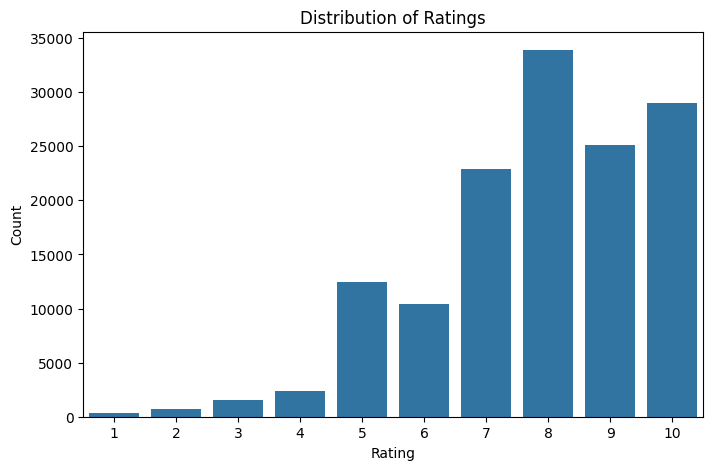

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x="book_rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Most Rated Books VS Worst Books 

In [65]:
books_state = df.groupby(['isbn','title']).agg(
    avg_rating = ('book_rating','mean'),
    rating_count = ('book_rating','count')
).reset_index()
books_state

,isbn,title,avg_rating,rating_count
0,0001047973,Brave New World,9.0,1
1,0001048082,Made in America,8.0,1
2,0002005018,Clara Callan,7.0,3
3,0002116286,There's A Seal in my Sleeping Bag,7.0,3
4,0002216140,Offshore,7.0,1
...,...,...,...,...
29823,B00011SOXI,The Stone Monkey : A Lincoln Rhyme Novel,8.0,1
29824,B0001FZGPI,The Bonesetter's Daughter,7.0,1
29825,B0001FZGRQ,The Clan of the Cave Bear,9.0,1
29826,B0001GMSV2,Find Me,8.0,2


In [66]:
# top 10 books 
top_books = books_state.sort_values(by='rating_count',ascending=False).head(10)
top_books

,isbn,title,avg_rating,rating_count
4676,0316666343,The Lovely Bones: A Novel,8.288184,347
9206,0385504209,The Da Vinci Code,8.494340,265
26423,0971880107,Wild Animus,4.097222,216
18103,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,8.988372,172
3695,0312195516,The Red Tent (Bestselling Backlist),8.343558,163
19141,0671027360,Angels &amp; Demons,8.236025,161
2941,0142001740,The Secret Life of Bees,8.493750,160
958,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,8.006410,156
5279,0345337662,Interview with the Vampire,7.843137,153
11244,043935806X,Harry Potter and the Order of the Phoenix (Boo...,9.125000,152


C:\Users\acer\AppData\Local\Temp\ipykernel_15932\2766451140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.title, x=top_books.rating_count, palette="viridis")


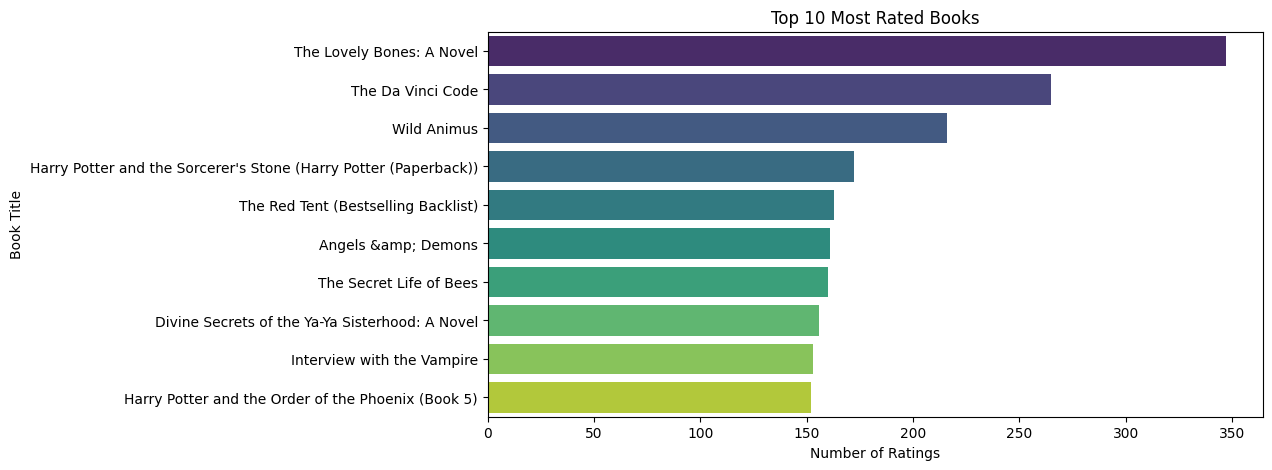

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.rating_count, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_15932\3333658719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.title, x=top_books.avg_rating, palette="viridis")


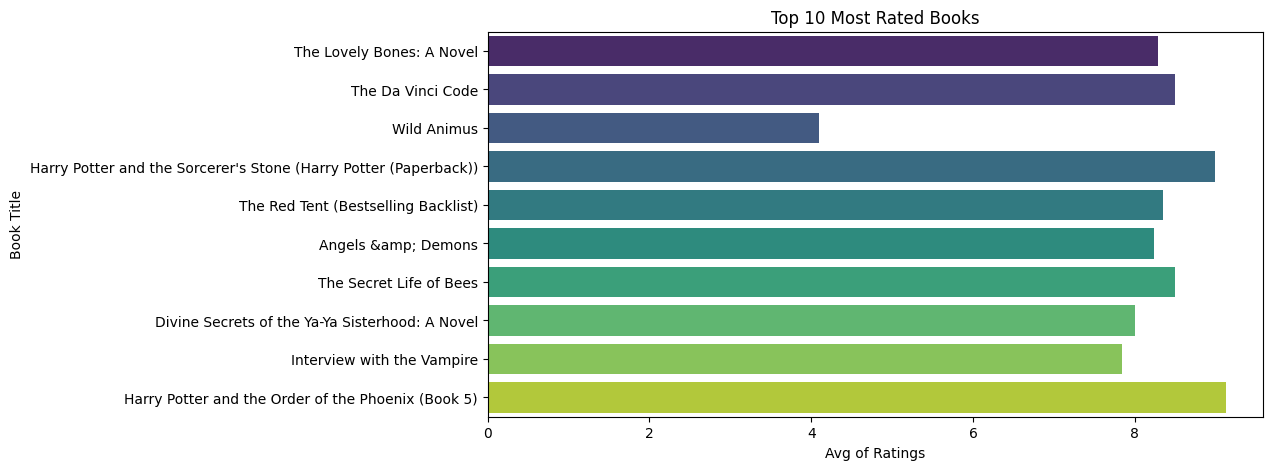

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.avg_rating, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Avg of Ratings")
plt.ylabel("Book Title")
plt.show()

# Top 10 Authors by Ratings

In [69]:
top_authors = df['author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)


Top 10 Authors:
 author
Stephen King          2857
Nora Roberts          1797
John Grisham          1255
James Patterson       1223
J. K. Rowling         1167
Dean R. Koontz         877
Janet Evanovich        860
Anne Rice              819
Mary Higgins Clark     780
Sue Grafton            655
Name: count, dtype: int64


# User Age Distribution

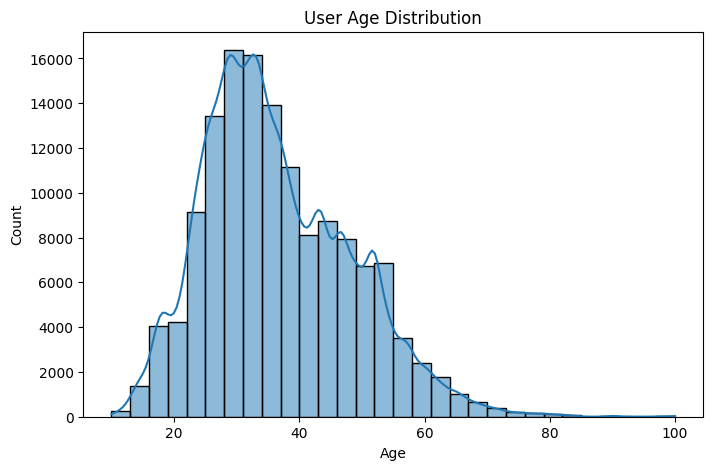

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df['user_age'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Rating by Year of Publication

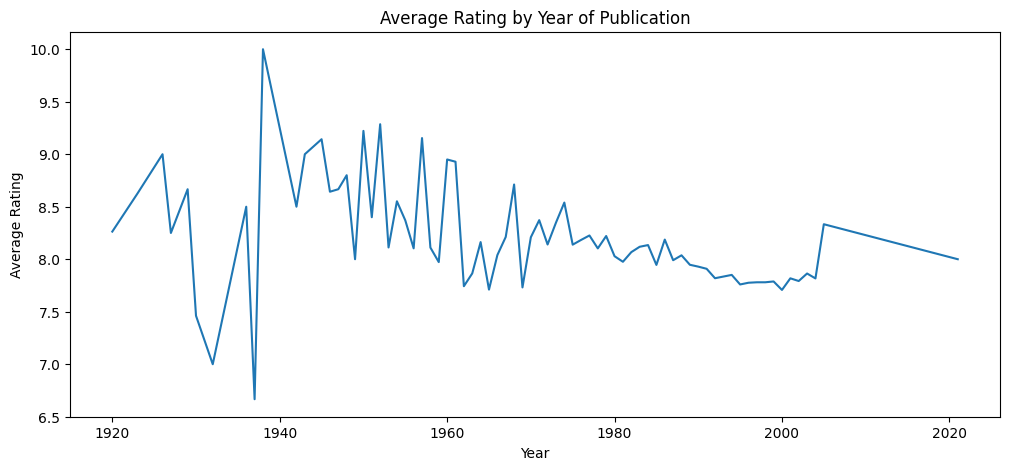

In [71]:
avg_rating_year = df.groupby("year")["book_rating"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="book_rating", data=avg_rating_year)
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Top 10 Countries with Most Users

In [72]:
top_countries = df['location'].value_counts().head(10)
print("\nTop 10 Countries:\n", top_countries)


Top 10 Countries:
 location
toronto, ontario, canada         2447
morrow, georgia, usa             1965
chicago, illinois, usa           1351
mechanicsville, maryland, usa    1138
ottawa, ontario, canada          1125
seattle, washington, usa         1024
portland, oregon, usa             982
san antonio, texas, usa           892
calgary, alberta, canada          828
st. louis, missouri, usa          817
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_15932\1047641188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")


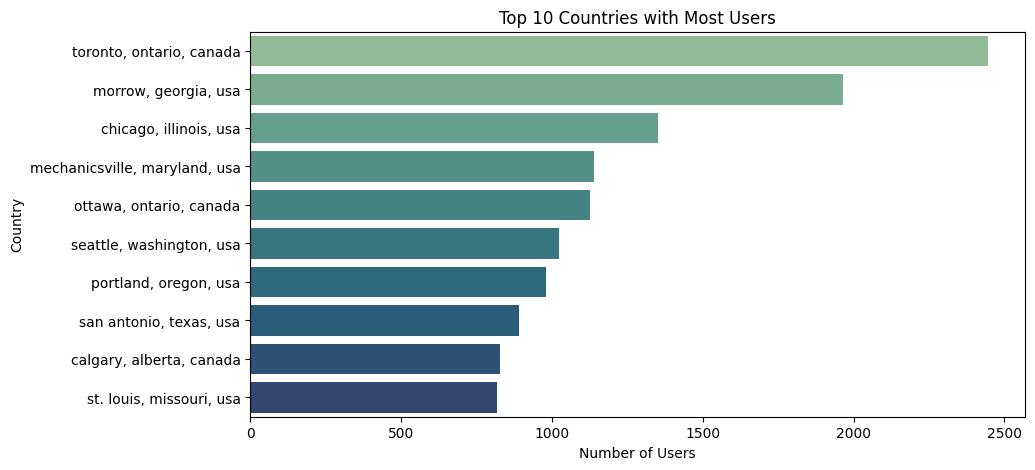

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Top 10 Locations by Average Rating

C:\Users\acer\AppData\Local\Temp\ipykernel_15932\976006046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")


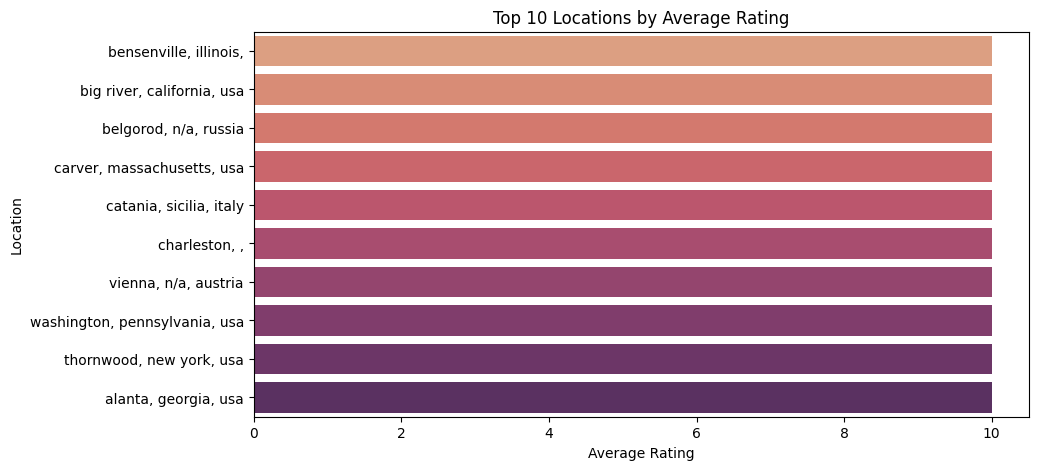

In [74]:
avg_rating_loc = df.groupby("location")["book_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

# Correlation Heatmap

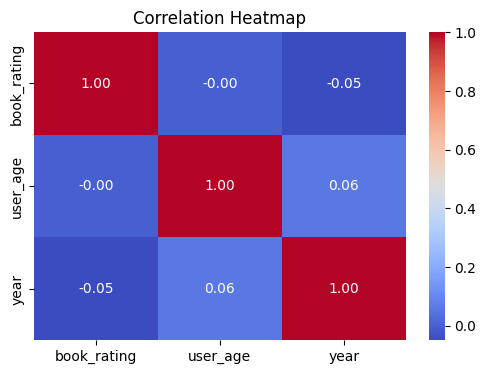

In [75]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['book_rating','user_age','year']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Distribution of Ratings by Age Groups (Boxplot)

C:\Users\acer\AppData\Local\Temp\ipykernel_15932\2581296430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")


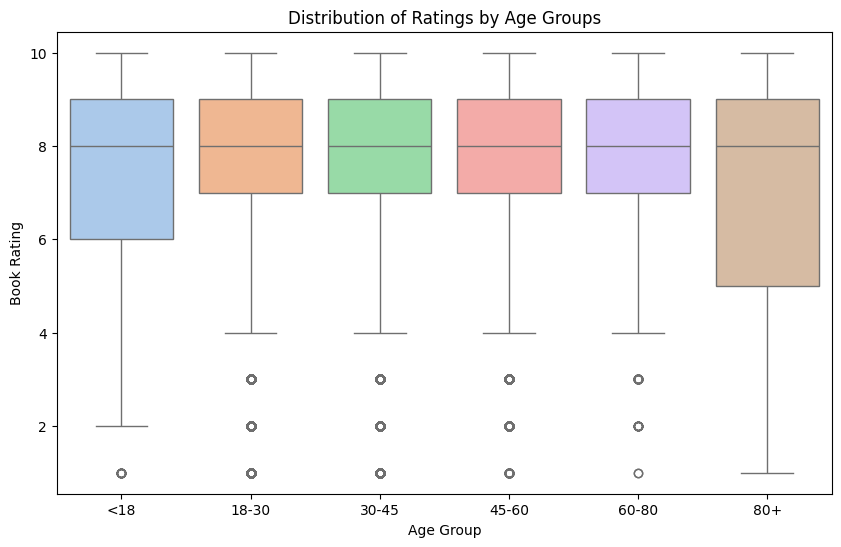

In [76]:
# Create age groups
df['age_group'] = pd.cut(df['user_age'], bins=[0,18,30,45,60,80,100], labels=['<18','18-30','30-45','45-60','60-80','80+'])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")
plt.title("Distribution of Ratings by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()


# Top 15 Publishers by Number of Books (Horizontal Barplot)

C:\Users\acer\AppData\Local\Temp\ipykernel_15932\3112309720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")


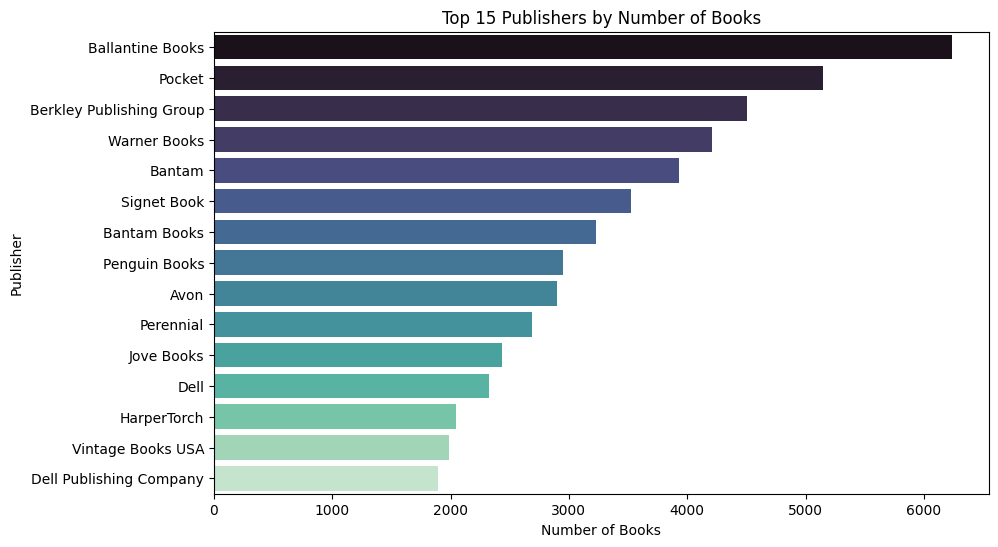

In [77]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")
plt.title("Top 15 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


# Scatterplot: User Age vs Book Rating (with transparency)

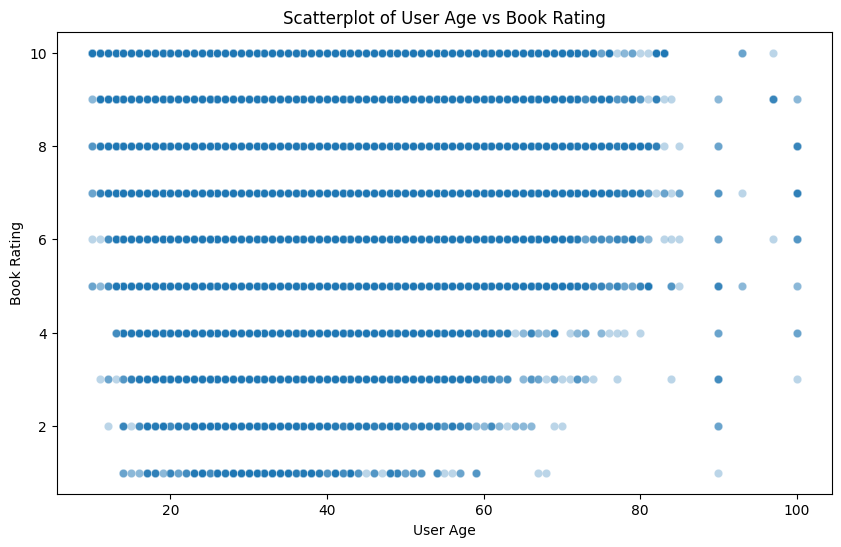

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_age', y='book_rating', data=df, alpha=0.3)
plt.title("Scatterplot of User Age vs Book Rating")
plt.xlabel("User Age")
plt.ylabel("Book Rating")
plt.show()
